# Zomato Data Analysis

## Importing Libraries

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [141]:
df = pd.read_csv('Zomato data .csv')

## Exploratory data analysis

In [142]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [143]:
df.tail()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining
147,Vijayalakshmi,Yes,No,3.9/5,47,200,Dining


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [145]:
df.shape

(148, 7)

In [146]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [147]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [148]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

## Data Cleaning

In [149]:
##convert the data type of column - rate


def handleRate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)

df['rate'] = df['rate'].apply(handleRate)
print(df.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


## Data Visualization

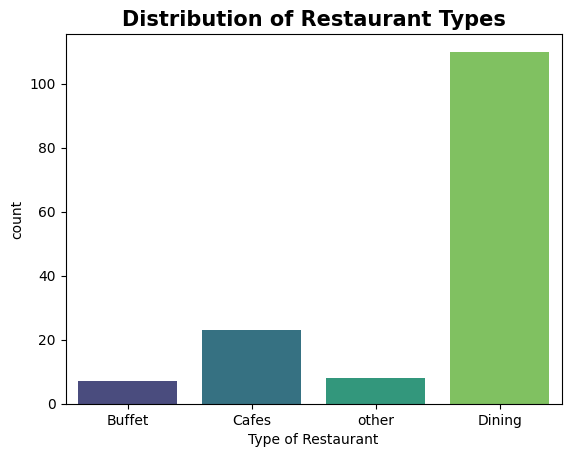

In [150]:
sns.countplot(x=df['listed_in(type)'],hue=df['listed_in(type)'],legend=False, palette='viridis')
plt.xlabel("Type of Restaurant")
plt.title("Distribution of Restaurant Types", fontsize=15, fontweight='bold')
plt.show()

### Conclusion : Majority of the restaurant falls in Dining category

In [151]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

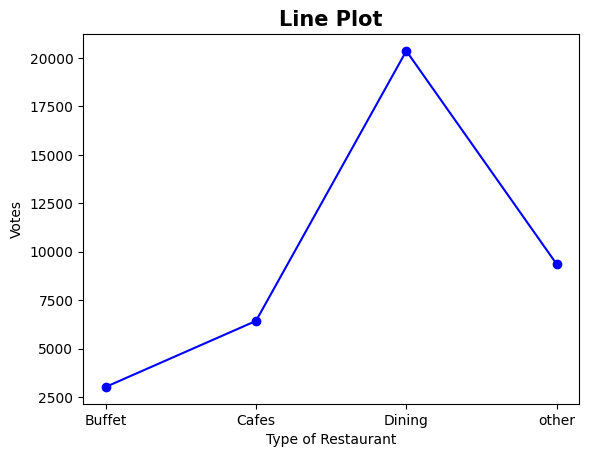

In [152]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes': grouped_data})
plt.plot(result, c= "blue", marker="o")
plt.xlabel("Type of Restaurant")
plt.ylabel("Votes")
plt.title("Line Plot", fontsize=15, fontweight="bold")
plt.show()

### Conclusion: Dining restaurants has received maximum votes

In [153]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

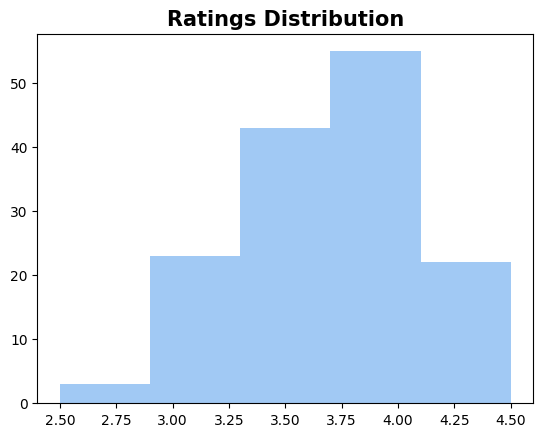

In [154]:
plt.hist(df['rate'], bins=5,range=(2.5, 4.5))
plt.title("Ratings Distribution",fontsize=15, fontweight="bold" )
plt.show()

### Conclusion: The majority restaurants recieved ratings between 3.5 and 4.0

In [155]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

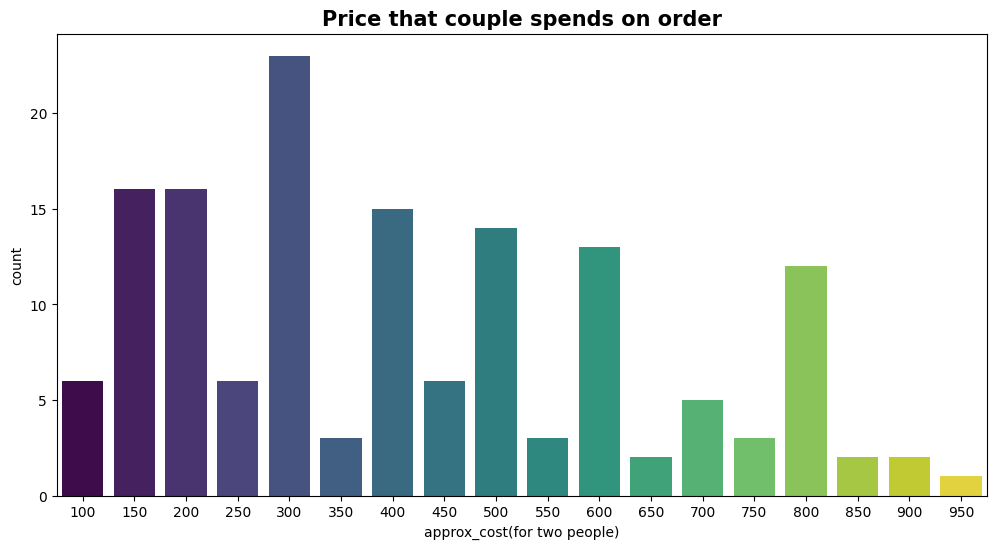

In [156]:
##Average order spending by couples

couple_data =df['approx_cost(for two people)']
plt.figure(figsize=(12,6))
sns.countplot(x= couple_data, hue=couple_data, legend=False, palette='viridis')
plt.title("Price that couple spends on order", fontsize=15, fontweight="bold")
plt.show()

### Conclusion: The majority couples prefer restaurants with an approximate cost of 300 rupees

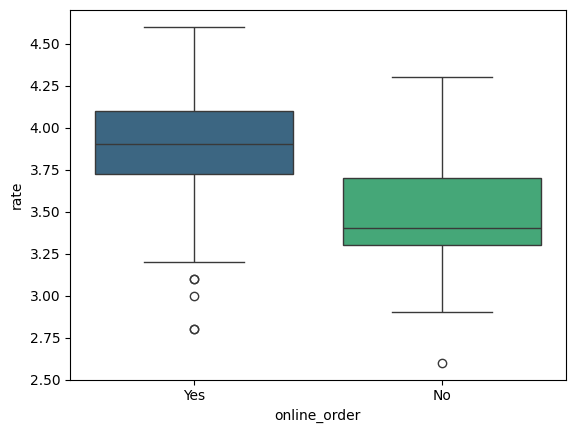

In [161]:
##mode which receives maximum rating

sns.boxplot(x='online_order', y='rate', hue='online_order', data=df,legend=False, palette='viridis')
plt.show()

### Conclusion: Offline orders received lower rating than Online orders

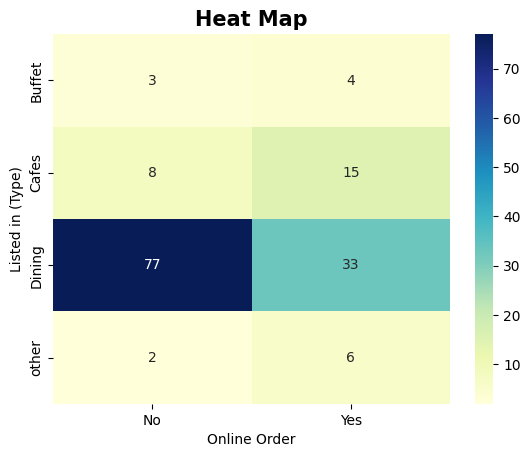

In [175]:
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heat Map",fontsize=15, fontweight="bold" )
plt.xlabel("Online Order")
plt.ylabel("Listed in (Type)")
plt.show()

### Conclusion: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer orders in person at dining restaurants , but prefer online ordering at cafes.